# Import Dataset, Split X,Y

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle

In [2]:
trainDF = pd.read_csv('E:/Sem5/ML-Final-Project/Dataset/train.csv', low_memory=False)
valDF = pd.read_csv('E:/Sem5/ML-Final-Project/Dataset/val.csv', low_memory=False)
testDF = pd.read_csv('E:/Sem5/ML-Final-Project/Dataset/test.csv', low_memory=False)

In [3]:
train_X = trainDF.drop(columns=['data_IMDBscore'])
train_Y = trainDF['data_IMDBscore']

In [4]:
val_X = valDF.drop(columns=['data_IMDBscore'])
val_Y = valDF['data_IMDBscore']

In [5]:
test_X = testDF.drop(columns=['data_IMDBscore'])
test_Y = testDF['data_IMDBscore']

# Train Model

In [6]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

### Grid Search

In [7]:
list_of_alphas = [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1]
gridSearch = GridSearchCV(estimator=Lasso(fit_intercept=True, copy_X=True, random_state=0), param_grid={'alpha':list_of_alphas}, n_jobs=-1)

In [8]:
gridSearch.fit(val_X,val_Y)

GridSearchCV(estimator=Lasso(random_state=0), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05,
                                   0.1, 0.5, 1]})

In [9]:
print(gridSearch.best_estimator_.alpha)

0.005


In [10]:
print(gridSearch.cv_results_['mean_test_score'])

[-0.59610317  0.17038483  0.28859227  0.32284915  0.30592017  0.18147558
  0.1120868  -0.00072692 -0.00072692]


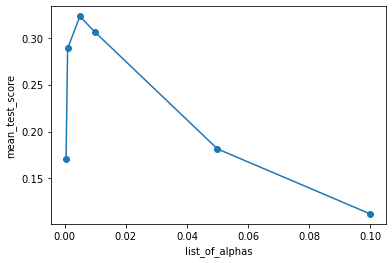

In [11]:
plt.scatter(list_of_alphas[1:7],gridSearch.cv_results_['mean_test_score'][1:7])
plt.plot(list_of_alphas[1:7],gridSearch.cv_results_['mean_test_score'][1:7])
plt.xlabel('list_of_alphas')
plt.ylabel('mean_test_score')
plt.savefig('Graphs/lasso_gs_fig1.png')
plt.show()

### Refined Grid Search

In [12]:
refined_list_of_alphas = [0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01]
refinedGridSearch = GridSearchCV(estimator=Lasso(fit_intercept=True, copy_X=True, random_state=0), param_grid={'alpha':refined_list_of_alphas}, n_jobs=-1)

In [13]:
refinedGridSearch.fit(val_X,val_Y)

GridSearchCV(estimator=Lasso(random_state=0), n_jobs=-1,
             param_grid={'alpha': [0.001, 0.002, 0.003, 0.004, 0.005, 0.006,
                                   0.007, 0.008, 0.009, 0.01]})

In [14]:
print(refinedGridSearch.best_estimator_.alpha)

0.002


In [15]:
print(refinedGridSearch.cv_results_['mean_test_score'])

[0.28859227 0.33469577 0.33372347 0.32780123 0.32284915 0.31930536
 0.3162134  0.31300975 0.3093921  0.30592017]


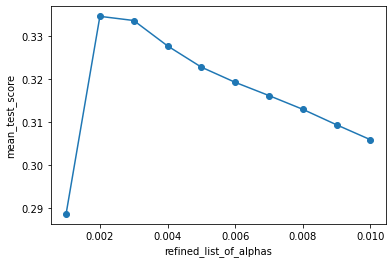

In [16]:
plt.scatter(refined_list_of_alphas,refinedGridSearch.cv_results_['mean_test_score'])
plt.plot(refined_list_of_alphas,refinedGridSearch.cv_results_['mean_test_score'])
plt.xlabel('refined_list_of_alphas')
plt.ylabel('mean_test_score')
plt.savefig('Graphs/lasso_gs_fig2.png')
plt.show()

In [17]:
ultra_refined_list_of_alphas = [0.001, 0.0011, 0.0012, 0.0013, 0.0014, 0.0015, 0.0016, 0.0017, 0.0018, 0.0019, 0.002]
ultraRefinedGridSearch = GridSearchCV(estimator=Lasso(fit_intercept=True, copy_X=True, random_state=0), param_grid={'alpha':ultra_refined_list_of_alphas}, n_jobs=-1)

In [18]:
ultraRefinedGridSearch.fit(val_X,val_Y)

GridSearchCV(estimator=Lasso(random_state=0), n_jobs=-1,
             param_grid={'alpha': [0.001, 0.0011, 0.0012, 0.0013, 0.0014,
                                   0.0015, 0.0016, 0.0017, 0.0018, 0.0019,
                                   0.002]})

In [19]:
print(ultraRefinedGridSearch.best_estimator_.alpha)

0.002


In [20]:
print(ultraRefinedGridSearch.cv_results_['mean_test_score'])

[0.28859227 0.29894083 0.30744478 0.31486238 0.32039155 0.32484247
 0.32817923 0.33077528 0.33252833 0.33368554 0.33469577]


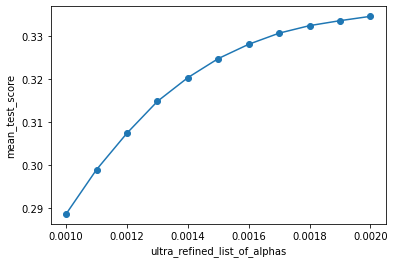

In [21]:
plt.scatter(ultra_refined_list_of_alphas,ultraRefinedGridSearch.cv_results_['mean_test_score'])
plt.plot(ultra_refined_list_of_alphas,ultraRefinedGridSearch.cv_results_['mean_test_score'])
plt.xlabel('ultra_refined_list_of_alphas')
plt.ylabel('mean_test_score')
plt.savefig('Graphs/lasso_gs_fig3.png')
plt.show()

### Best Model Training and Testing

In [22]:
lasso_model = Lasso(alpha=0.002, fit_intercept=True, copy_X=True, random_state=0)

In [23]:
lasso_model.fit(train_X, train_Y)

Lasso(alpha=0.002, random_state=0)

In [24]:
print('Train R^2: ', lasso_model.score(train_X, train_Y))
print('Train MSE: ', mean_squared_error(lasso_model.predict(train_X), train_Y))

print('Val R^2: ', lasso_model.score(val_X, val_Y))
print('Val MSE: ', mean_squared_error(lasso_model.predict(val_X), val_Y))

print('Test R^2: ', lasso_model.score(test_X, test_Y))
print('Test MSE: ', mean_squared_error(lasso_model.predict(test_X), test_Y))

Train R^2:  0.38603195355940634
Train MSE:  0.7314310899663621
Val R^2:  0.37216973282757726
Val MSE:  0.7719054651233384
Test R^2:  0.38596204896485553
Test MSE:  0.7268179723950019


# Saving Model

In [25]:
# filename = 'Linear_Regression_Lasso.sav'
# pickle.dump(lasso_model, open(filename, 'wb'))